In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
data.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


<Axes: >

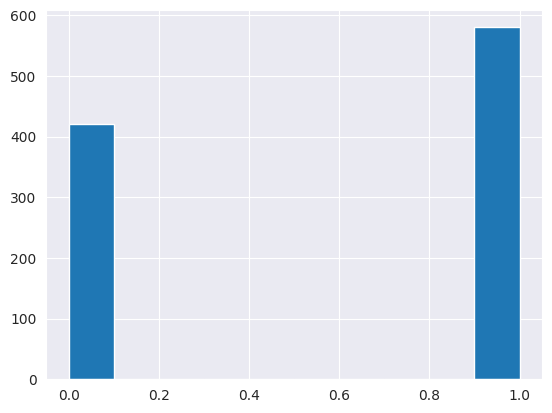

In [3]:
data['target'].hist()

<Axes: >

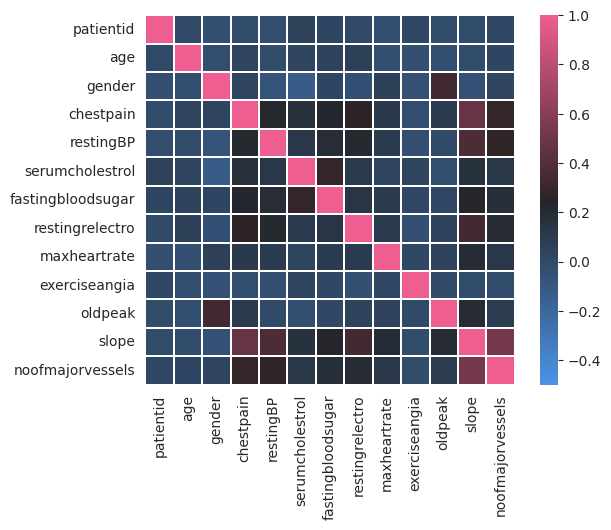

In [4]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

<Axes: xlabel='restingBP', ylabel='Count'>

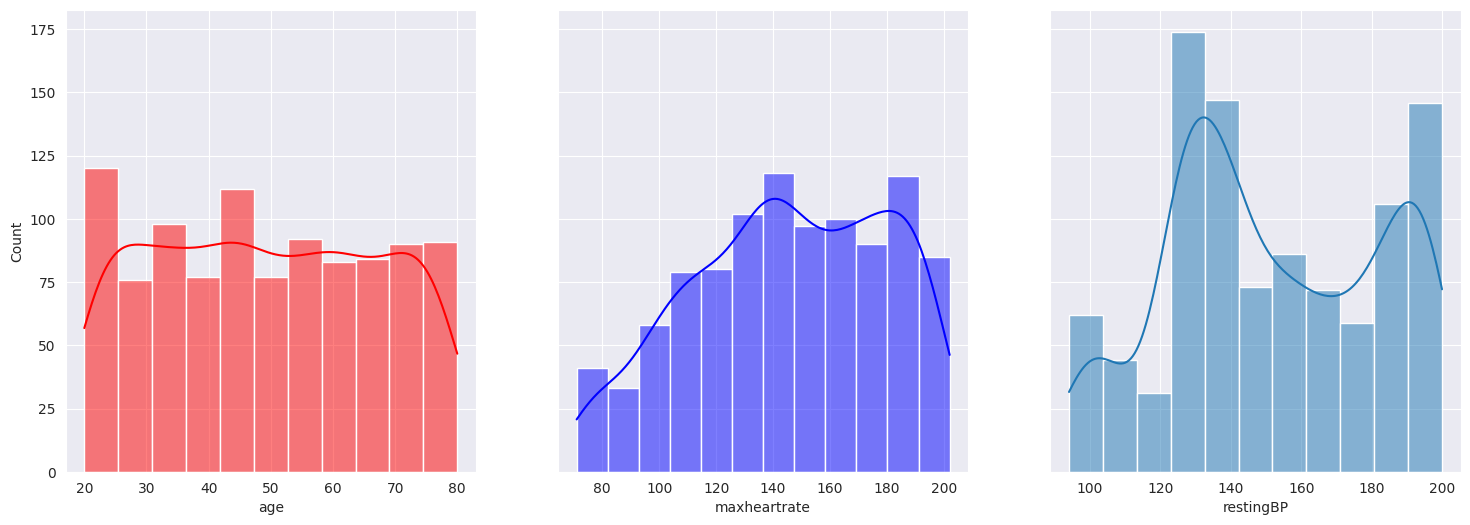

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="maxheartrate", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="restingBP", kde=True)

In [6]:
# NAIVE BAYES STUFF
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="target")

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy: ' ,accuracy_score(Y_test, Y_pred))
print("f1 score: " ,f1_score(Y_test, Y_pred))

[[ 74   6]
 [  3 117]]
Accuracy:  0.955
f1 score:  0.9629629629629629


In [57]:
data["cat_age"] = pd.cut(data["age"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_gender"] = pd.cut(data["gender"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_chestpain"] = pd.cut(data["chestpain"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_restingBP"] = pd.cut(data["restingBP"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_serumcholestrol"] = pd.cut(data["serumcholestrol"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_fastingbloodsugar"] = pd.cut(data["fastingbloodsugar"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_restingrelectro"] = pd.cut(data["restingrelectro"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_maxheartrate"] = pd.cut(data["maxheartrate"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_exerciseangia"] = pd.cut(data["exerciseangia"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_oldpeak"] = pd.cut(data["oldpeak"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_slope"] = pd.cut(data["slope"].values, bins = 5, labels = [0,1,2,3,4])
data["cat_noofmajorvessels"] = pd.cut(data["noofmajorvessels"].values, bins = 5, labels = [0,1,2,3,4])

data = data.drop(columns=["age", "gender", "chestpain",'restingBP', 'serumcholestrol','fastingbloodsugar','restingrelectro','maxheartrate','exerciseangia','oldpeak','slope','noofmajorvessels'])
data = data[["cat_age","cat_gender","cat_chestpain","cat_restingBP","cat_serumcholestrol","cat_fastingbloodsugar","cat_restingrelectro","cat_restingrelectro","cat_maxheartrate","cat_exerciseangia","cat_oldpeak",'cat_slope','cat_noofmajorvessels','target']]
data.head(10)

,cat_age,cat_gender,cat_chestpain,cat_restingBP,cat_serumcholestrol,cat_fastingbloodsugar,cat_restingrelectro,cat_restingrelectro,cat_maxheartrate,cat_exerciseangia,cat_oldpeak,cat_slope,cat_noofmajorvessels,target
0,2,4,3,3,0,0,2,2,2,0,4,4,4,1
1,1,4,0,0,1,0,2,2,1,0,2,1,1,0
2,2,4,3,1,1,0,0,0,4,4,4,1,0,0
3,1,4,0,2,2,4,2,2,3,0,2,3,3,1
4,0,4,1,4,0,0,4,4,2,0,4,4,3,1
5,0,4,1,3,0,0,0,0,3,0,3,4,3,1
6,4,4,3,1,1,0,4,4,3,0,2,3,1,1
7,2,4,0,1,2,0,0,0,4,4,3,1,0,0
8,3,4,0,1,2,0,2,2,2,0,2,0,0,0
9,3,0,0,4,1,0,2,2,3,0,2,3,0,1


In [58]:
# SECOND APPROACH, NOT WORKING CURRENTLY
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [64]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="target")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

ValueError: cannot reindex on an axis with duplicate labels

In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="target")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

ValueError: cannot reindex on an axis with duplicate labels